In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('events.csv')

In [3]:
df['Event'].value_counts()

Accurate Pass      64
Clearance          10
Interception        8
Inaccurate Pass     6
Tackle              4
Name: Event, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    92 non-null     object
 1   Player  92 non-null     object
 2   Event   92 non-null     object
 3   X       92 non-null     int64 
 4   Y       92 non-null     int64 
 5   X2      92 non-null     object
 6   Y2      92 non-null     object
dtypes: int64(2), object(5)
memory usage: 5.2+ KB


In [5]:
passes = df[(df['Event']=='Accurate Pass') | (df['Event']=='Inaccurate Pass')]

In [6]:
passes['X2'] = pd.to_numeric(passes['X2'])
passes['Y2'] = pd.to_numeric(passes['Y2'])

In [7]:
# find distance between passes

passes['distance'] = np.sqrt((passes['X'] - passes['X2'])**2 + (passes['Y'] - passes['Y2'])**2)

In [8]:
passes

,Team,Player,Event,X,Y,X2,Y2,distance
0,BJK,Aytug Batur Kömec,Accurate Pass,17,52,19,79,27.073973
1,BJK,Aytug Batur Kömec,Accurate Pass,17,25,24,9,17.464249
2,BJK,Aytug Batur Kömec,Accurate Pass,38,39,76,95,67.675697
3,BJK,Aytug Batur Kömec,Accurate Pass,14,28,18,64,36.221541
4,BJK,Aytug Batur Kömec,Accurate Pass,22,19,52,5,33.105891
...,...,...,...,...,...,...,...,...
86,BJK,Aytug Batur Kömec,Accurate Pass,38,11,37,50,39.012818
87,BJK,Aytug Batur Kömec,Accurate Pass,39,35,48,69,35.171011
88,BJK,Aytug Batur Kömec,Accurate Pass,23,26,35,40,18.439089
89,BJK,Aytug Batur Kömec,Accurate Pass,58,37,83,11,36.069378


### Action Map and Pass Map

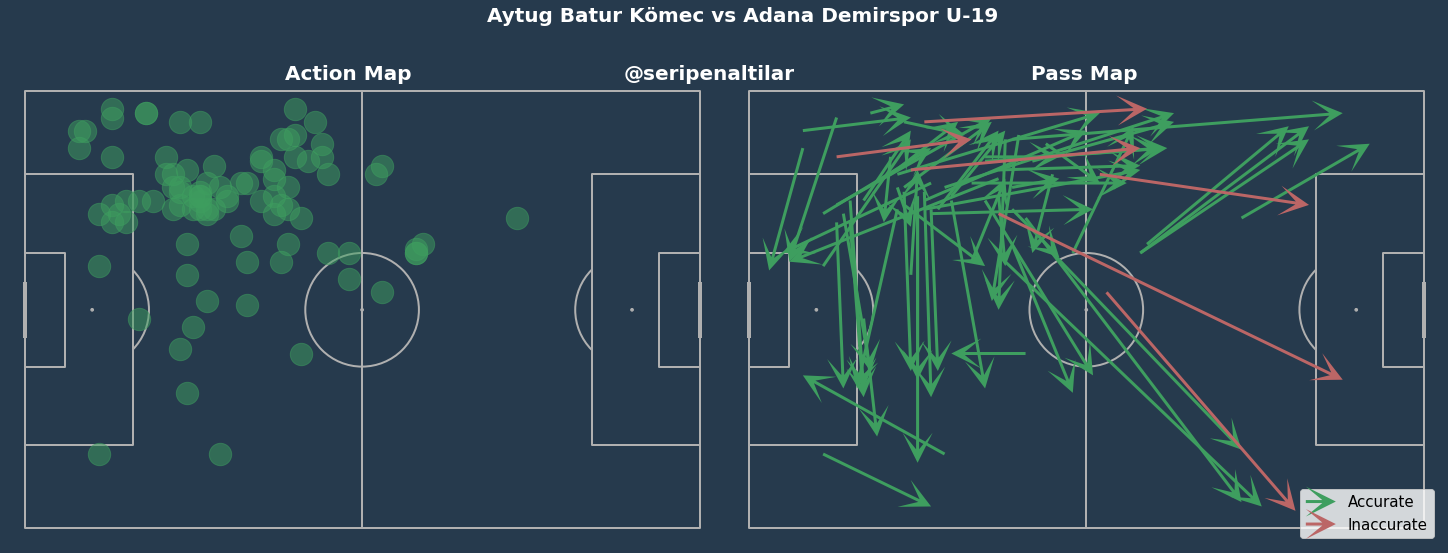

In [9]:
pitch = Pitch(pitch_type='wyscout',pitch_color='#263a4d')


fig, axs = pitch.draw(nrows=1, ncols=2, tight_layout=False, constrained_layout=True,figsize=(20,20))

fig.patch.set_facecolor('#263a4d')

pitch.scatter(df['X'],df['Y'],ax=axs[0],c='#3e9e5f',alpha=.5,s=500)
pitch.arrows(passes[passes['Event']=='Accurate Pass']['X'], passes[passes['Event']=='Accurate Pass']['Y'],
    passes[passes['Event']=='Accurate Pass']['X2'], passes[passes['Event']=='Accurate Pass']['Y2'], ax=axs[1], color="#3e9e5f", width=3,
             headwidth=10, headlength=10,label='Accurate')

pitch.arrows(passes[passes['Event']=='Inaccurate Pass']['X'], passes[passes['Event']=='Inaccurate Pass']['Y'],
    passes[passes['Event']=='Inaccurate Pass']['X2'], passes[passes['Event']=='Inaccurate Pass']['Y2'], ax=axs[1], color="#bb6666", width=3,
             headwidth=10, headlength=10,label='Inaccurate')

plt.figtext(0.335,0.70,'Aytug Batur Kömec vs Adana Demirspor U-19',fontsize=20,color='white',fontweight='bold')
plt.figtext(0.195,0.66,'Action Map',fontsize=20,color='white',fontweight='bold')
plt.figtext(0.713,0.66,'Pass Map',fontsize=20,color='white',fontweight='bold')
plt.figtext(0.43,0.66,'@seripenaltilar',fontsize=20,color='white',fontweight='bold')
plt.legend(loc=4,fontsize=15)
plt.show()

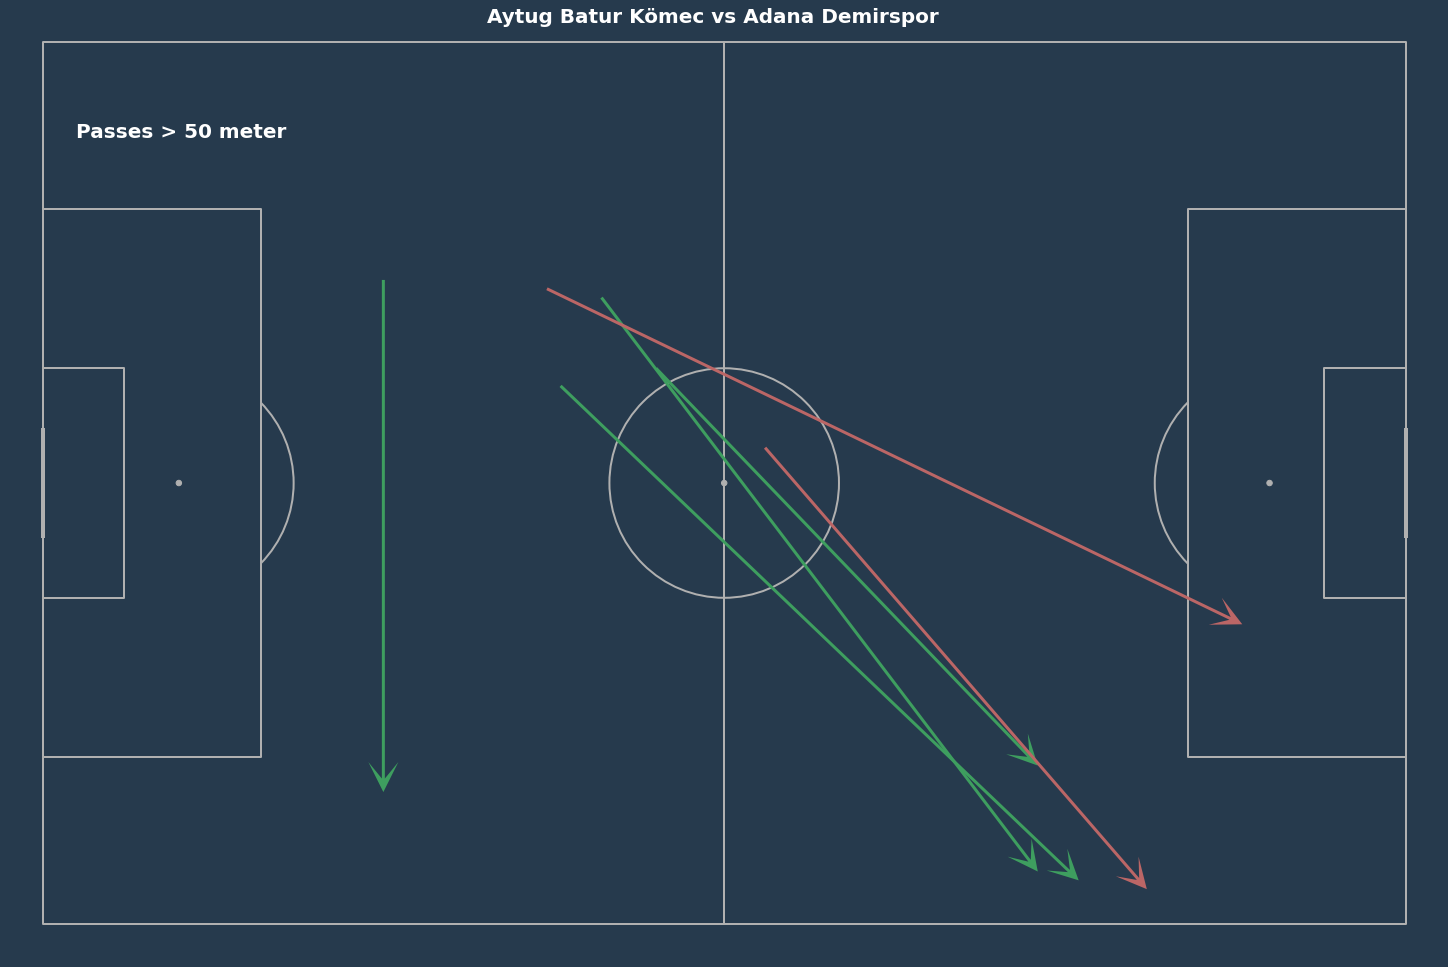

In [10]:
pitch = Pitch(pitch_type='wyscout',pitch_color='#263a4d')


fig, ax = pitch.draw(tight_layout=False, constrained_layout=True,figsize=(20,16))

fig.patch.set_facecolor('#263a4d')


pitch.arrows(passes[(passes['Event']=='Accurate Pass') & (passes['distance']>=50)]['X'], 
             passes[(passes['Event']=='Accurate Pass') & (passes['distance']>=50)]['Y'],
             passes[(passes['Event']=='Accurate Pass') & (passes['distance']>=50)]['X2'], 
             passes[(passes['Event']=='Accurate Pass') & (passes['distance']>=50)]['Y2'], 
             ax=ax, color="#3e9e5f", width=3,
             headwidth=10, headlength=10)

pitch.arrows(passes[(passes['Event']=='Inaccurate Pass') & (passes['distance']>=50)]['X'], 
             passes[(passes['Event']=='Inaccurate Pass') & (passes['distance']>=50)]['Y'],
             passes[(passes['Event']=='Inaccurate Pass') & (passes['distance']>=50)]['X2'], 
             passes[(passes['Event']=='Inaccurate Pass') & (passes['distance']>=50)]['Y2'], 
             ax=ax, color="#bb6666", width=3,
             headwidth=10, headlength=10)


plt.figtext(0.335,0.90,'Aytug Batur Kömec vs Adana Demirspor',fontsize=20,color='white',fontweight='bold')
plt.figtext(0.05,0.80,'Passes > 50 meter',fontsize=20,color='white',fontweight='bold')
plt.show()

### Heat maps

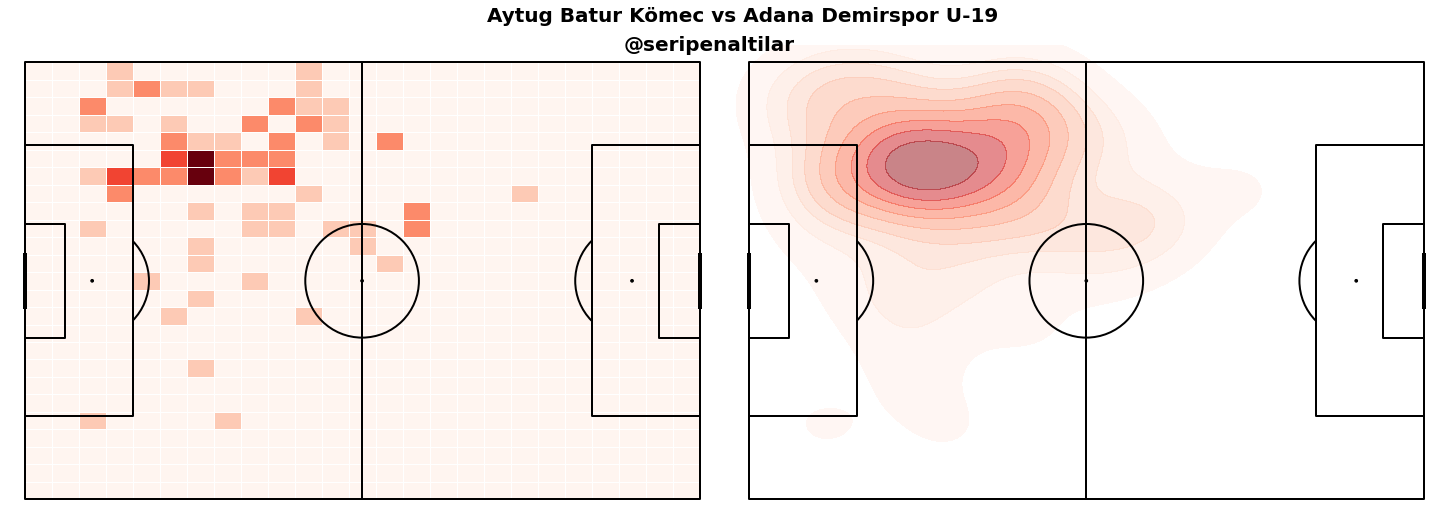

In [11]:
# Plot different heatmaps type

pitch = Pitch(pitch_type='wyscout', line_zorder=2,
              pitch_color='#ffffff', line_color='#000000')

fig, ax = pitch.draw(nrows=1, ncols=2,figsize=(20, 20), constrained_layout=True, tight_layout=False)

stats = pitch.bin_statistic(df['X'], df['Y'], statistic='count', bins=(25,25))
pitch.heatmap(stats, edgecolors='#ffffff', cmap='Reds', ax=ax[0])

sns.kdeplot(x=df['X'], y=df['Y'], fill=True, cmap='Reds', alpha=.5,ax=ax[1])

plt.figtext(0.335,0.68,'Aytug Batur Kömec vs Adana Demirspor U-19',fontsize=20,fontweight='bold')
plt.figtext(0.43,0.66,'@seripenaltilar',fontsize=20,fontweight='bold')

plt.show()